In [148]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [149]:
iris = datasets.load_iris()


In [150]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, train_size=0.80, test_size=0.20, random_state=5)

In [151]:
rbf = svm.SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)
linear = svm.SVC(kernel='linear').fit(X_train, y_train)


In [152]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
linear_pred = linear.predict(X_test)


In [153]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ',  "%.2f" % (poly_f1*100))


Accuracy (Polynomial Kernel):  96.67
F1 (Polynomial Kernel):  96.66


In [154]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))


Accuracy (RBF Kernel):  96.67
F1 (RBF Kernel):  96.66


In [155]:
linear_acc = accuracy_score(y_test, linear_pred)
lin_f1 = f1_score(y_test, linear_pred, average='weighted')
print('Accuracy (linear): ', "%.2f" % (linear_acc*100))
print('F1 linear: ', "%.2f" % (lin_f1*100))

Accuracy (linear):  93.33
F1 linear:  93.28


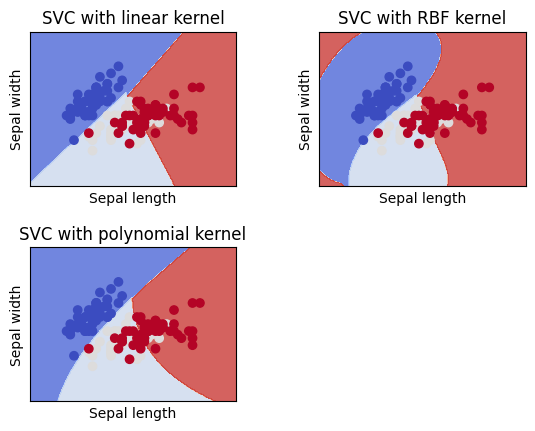

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
iris = datasets.load_iris()
X = iris.data[:, :2]

y = iris.target

h = .02  
svc = svm.SVC(kernel='linear').fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial kernel']


for i, clf in enumerate((svc,  rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()  
